In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE


In [2]:
loan_dataset = pd.read_csv('Loan-Approval-Prediction.csv')
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan_dataset.shape

(614, 13)

In [6]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_dataset.duplicated().sum()

0

In [8]:
print("Number of unique values in each categorical feature:")
categorical_cols = loan_dataset.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    print(f"'{col}': {loan_dataset[col].nunique()} unique values")
print("\n")

Number of unique values in each categorical feature:
'Loan_ID': 614 unique values
'Gender': 2 unique values
'Married': 2 unique values
'Dependents': 4 unique values
'Education': 2 unique values
'Self_Employed': 2 unique values
'Property_Area': 3 unique values
'Loan_Status': 2 unique values




In [9]:
print("Distribution of the target variable 'Loan_Status':")
print(loan_dataset['Loan_Status'].value_counts())
print("\n")

Distribution of the target variable 'Loan_Status':
Loan_Status
Y    422
N    192
Name: count, dtype: int64




In [10]:
for cols in ['Gender','Married','Dependents','Self_Employed','Credit_History']:
    if loan_dataset[cols].isnull().sum() > 0:
        mode_value = loan_dataset[cols].mode()[0]
        loan_dataset[cols] = loan_dataset[cols].fillna(mode_value)


In [11]:
for cols in ['LoanAmount','Loan_Amount_Term']:
    if loan_dataset[cols].isnull().sum() > 0 :
        median_value = loan_dataset[cols].median()
        loan_dataset[cols] = loan_dataset[cols].fillna(median_value)

In [12]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
loan_dataset['Dependents'] = loan_dataset['Dependents'].str.replace('3+','3',regex=False).astype(int)

In [14]:
le = LabelEncoder()
binary_cols = ['Gender','Married','Self_Employed','Education','Loan_Status','Credit_History']
for cols in binary_cols:
    loan_dataset[cols] = le.fit_transform(loan_dataset[cols])

In [15]:
loan_dataset = pd.get_dummies(loan_dataset,columns=['Property_Area'],drop_first=True)

In [16]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,1,False,True
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,False,False
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,1,False,True
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,1,False,True
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1,1,False,False
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1,1,False,False
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1,1,False,True
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1,1,False,True


In [17]:
loan_dataset = loan_dataset.drop(columns='Loan_ID',axis=1)

In [18]:
loan_dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,1,False,True
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,False,False
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,1,False,True
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,1,False,True
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1,1,False,False
610,1,1,3,0,0,4106,0.0,40.0,180.0,1,1,False,False
611,1,1,1,0,0,8072,240.0,253.0,360.0,1,1,False,True
612,1,1,2,0,0,7583,0.0,187.0,360.0,1,1,False,True


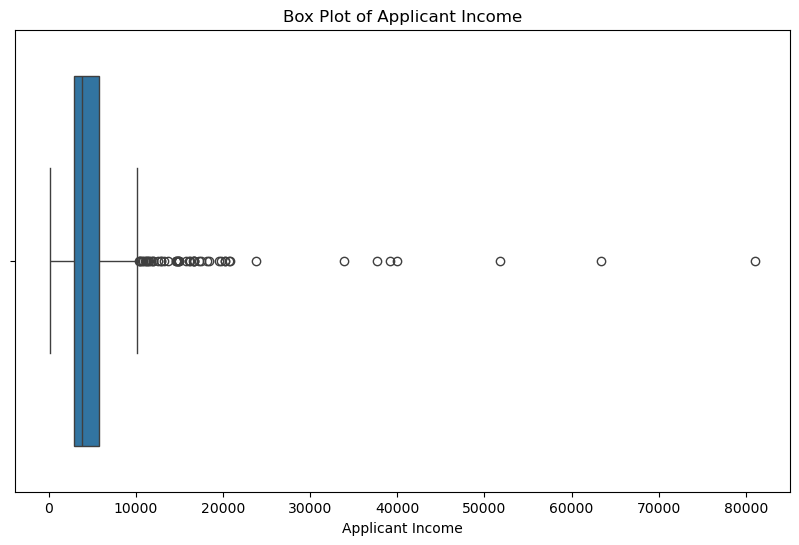

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=loan_dataset['ApplicantIncome'])
plt.title('Box Plot of Applicant Income')
plt.xlabel('Applicant Income')
plt.show()

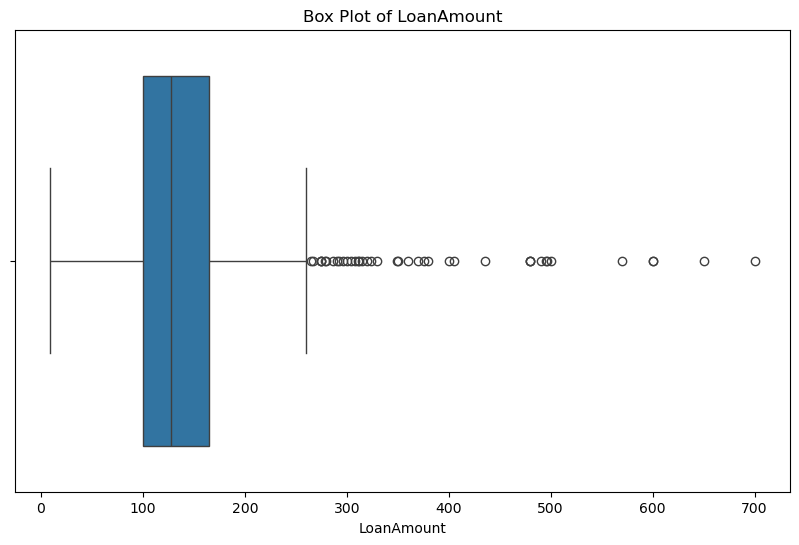

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=loan_dataset['LoanAmount'])
plt.title('Box Plot of LoanAmount')
plt.xlabel('LoanAmount')
plt.show()

In [21]:
def handling_outliers(loan_dataset):
    loan_clean_data = loan_dataset.copy()
    numeric_cols = loan_clean_data.select_dtypes(include='number').columns.tolist()
    for cols in numeric_cols:
        q1 = loan_clean_data[cols].quantile(0.25)
        q3 = loan_clean_data[cols].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR

        loan_clean_data[cols] = np.where(
            loan_clean_data[cols] < lower_bound, lower_bound,
            np.where(loan_clean_data[cols] > upper_bound, upper_bound, loan_clean_data[cols])
        )

    return loan_clean_data
    

In [22]:
loan_new_data = handling_outliers(loan_dataset)

In [23]:
print("Original DataFrame head:")
print(loan_dataset[['ApplicantIncome', 'LoanAmount']].head())
print("\nDataFrame head after handling outliers:")
print(loan_new_data[['ApplicantIncome', 'LoanAmount']].head())

Original DataFrame head:
   ApplicantIncome  LoanAmount
0             5849       128.0
1             4583       128.0
2             3000        66.0
3             2583       120.0
4             6000       141.0

DataFrame head after handling outliers:
   ApplicantIncome  LoanAmount
0           5849.0       128.0
1           4583.0       128.0
2           3000.0        66.0
3           2583.0       120.0
4           6000.0       141.0


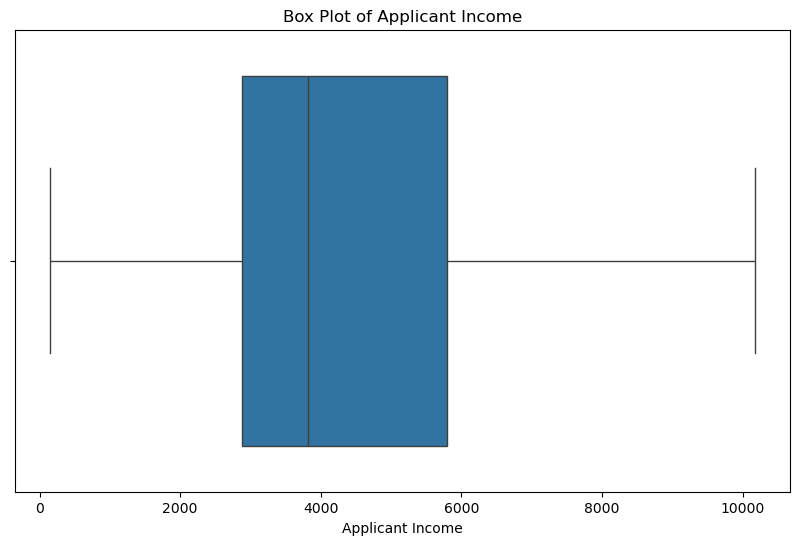

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=loan_new_data['ApplicantIncome'])
plt.title('Box Plot of Applicant Income')
plt.xlabel('Applicant Income')
plt.show()

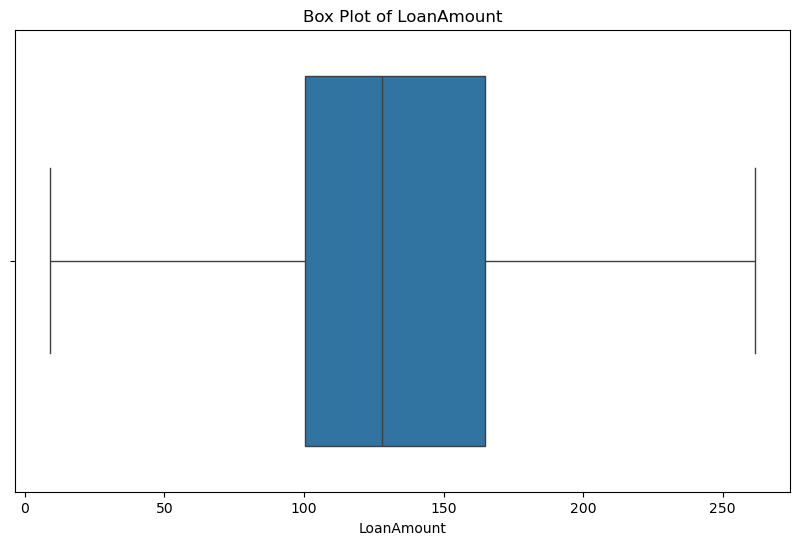

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=loan_new_data['LoanAmount'])
plt.title('Box Plot of LoanAmount')
plt.xlabel('LoanAmount')
plt.show()

In [26]:
X = loan_new_data.drop(columns='Loan_Status',axis=1)
Y = loan_new_data['Loan_Status']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [28]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)


In [30]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

In [31]:
y_predict = model.predict(x_test_scaled)

In [32]:
accuracy = accuracy_score(y_test,y_predict) 
conf_matrix = confusion_matrix(y_test,y_predict) 
class_report = classification_report(y_test, y_predict)


print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Model Accuracy: 0.54
Confusion Matrix:
[[26 17]
 [39 41]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.40      0.60      0.48        43
         1.0       0.71      0.51      0.59        80

    accuracy                           0.54       123
   macro avg       0.55      0.56      0.54       123
weighted avg       0.60      0.54      0.55       123



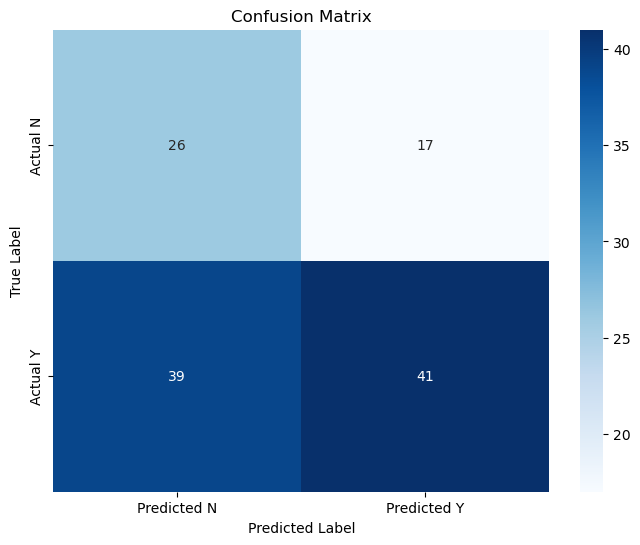

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted N', 'Predicted Y'], yticklabels=['Actual N', 'Actual Y'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [74]:
model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

In [76]:
y_predict_2 = model_2.predict(x_test_scaled)

In [78]:
accuracy_2 = accuracy_score(y_test,y_predict_2) 
conf_matrix_2 = confusion_matrix(y_test,y_predict_2) 
class_report_2 = classification_report(y_test, y_predict_2)


print(f"Model Accuracy: {accuracy_2:.2f}")
print("Confusion Matrix:")
print(conf_matrix_2)
print("Classification Report:")
print(class_report_2)

Model Accuracy: 0.54
Confusion Matrix:
[[15 28]
 [29 51]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.34      0.35      0.34        43
         1.0       0.65      0.64      0.64        80

    accuracy                           0.54       123
   macro avg       0.49      0.49      0.49       123
weighted avg       0.54      0.54      0.54       123



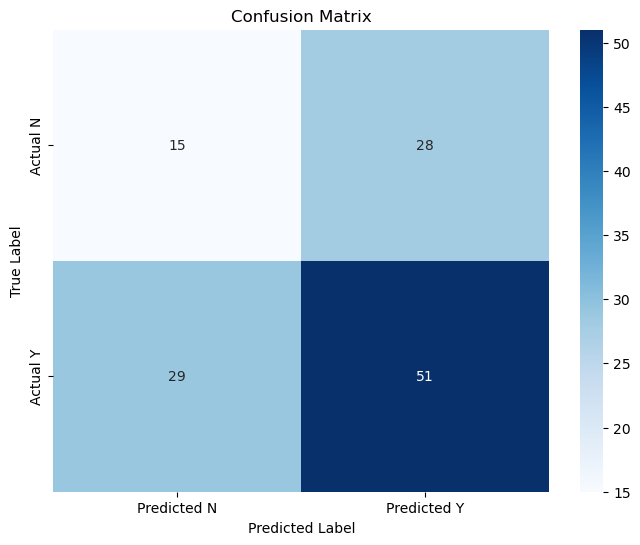

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted N', 'Predicted Y'], yticklabels=['Actual N', 'Actual Y'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [90]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return {
        "Model": model_name,
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1-Score": round(f1, 3)
    }



In [92]:
# Compare both
results = []
results.append(evaluate_model(y_test, y_predict, "Logistic Regression"))
results.append(evaluate_model(y_test, y_predict_2, "Decision Tree"))


In [94]:
comparison_df = pd.DataFrame(results)
print(comparison_df)

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression     0.545      0.707   0.512     0.594
1        Decision Tree     0.537      0.646   0.638     0.642


In [96]:
best_model = comparison_df.sort_values(by="F1-Score", ascending=False).iloc[0]
print("\n Best Model:", best_model["Model"], "with F1 =", best_model["F1-Score"])


✅ Best Model: Decision Tree with F1 = 0.642
